In [33]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [61]:
xgb_class = pd.read_csv('pool_boost_class_df.csv', index_col = 'Unnamed: 0')
xgb_reg = pd.read_csv('pool_boost_reg_df.csv', index_col = 'Unnamed: 0')
forest_reg = pd.read_csv('pool_forest_df.csv', index_col = 'Unnamed: 0')
data_cagr = pd.read_csv('model_df_cagr.csv', index_col = 'Unnamed: 0')

In [3]:
#xgb_class = xgb_class.drop(columns = ['loan_status','prob_paid_back','emp_title'])
#xgb_reg = xgb_reg.drop(columns = ['prediction'])
#forest_reg = forest_reg.drop(columns = ['test_prediction'])

In [4]:
dfs = [xgb_class, xgb_reg, forest_reg, data_cagr]

In [58]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
list(data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [62]:
xgb_class = xgb_class.join(data_cagr['id'], how = 'left')
xgb_reg = xgb_reg.join(data_cagr['id'], how = 'left')
forest_reg = forest_reg.join(data_cagr['id'], how = 'left')

In [63]:
xgb_class['model'] = 'XGBoost Classifier'
xgb_reg['model'] = 'XGBoost Regressor'
forest_reg['model'] = 'Random Forest Regressor'
data_cagr['model'] = 'Population'

In [64]:
# merge grade, loan status
xgb_class = xgb_class.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
xgb_reg = xgb_reg.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
forest_reg = forest_reg.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
data_cagr = data_cagr.merge(data[['loan_status','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))

In [65]:
pools = pd.concat([xgb_class[['cagr','id','model']],xgb_reg[['cagr','id','model']],forest_reg[['cagr','id','model']],data_cagr[['cagr','id','model']]],axis = 0)

In [66]:
pools = pools.merge(data[['id','loan_amnt','annual_inc','installment','term','int_rate','grade','sub_grade','emp_length','home_ownership','loan_status','issue_d','addr_state','dti','fico_range_high','revol_util','total_pymnt','chargeoff_within_12_mths', 'total_acc', 'earliest_cr_line', 'revol_bal']])

In [67]:
pools['earliest_cr_line'] = pd.to_datetime(list(pools['earliest_cr_line']))
pools['issue_d'] = pd.to_datetime(list(pools['issue_d']))


In [68]:
pools['issue_d'].dtypes

dtype('<M8[ns]')

In [69]:
pools['cred_hist_years'] = round((pools['issue_d'] - pools['earliest_cr_line'])/pd.Timedelta(days=365),1)

In [70]:
pools.head()

,cagr,id,model,loan_amnt,annual_inc,installment,term,int_rate,grade,sub_grade,emp_length,home_ownership,loan_status,issue_d,addr_state,dti,fico_range_high,revol_util,total_pymnt,chargeoff_within_12_mths,total_acc,earliest_cr_line,revol_bal,cred_hist_years
0,0.009320,37840324,XGBoost Classifier,1125.0,23000.0,40.19,36 months,17.14,D,D4,3 years,RENT,Fully Paid,2014-12-01,AR,26.98,719.0,78.3,1156.75000,0.0,12.0,2005-08-01,5561.0,9.3
1,0.009320,37840324,Population,1125.0,23000.0,40.19,36 months,17.14,D,D4,3 years,RENT,Fully Paid,2014-12-01,AR,26.98,719.0,78.3,1156.75000,0.0,12.0,2005-08-01,5561.0,9.3
2,0.002807,36039529,XGBoost Classifier,1300.0,16000.0,45.70,36 months,15.99,D,D2,2 years,MORTGAGE,Fully Paid,2014-12-01,CA,13.95,674.0,15.8,1310.98000,0.0,46.0,1998-07-01,3666.0,16.4
3,0.002807,36039529,Population,1300.0,16000.0,45.70,36 months,15.99,D,D2,2 years,MORTGAGE,Fully Paid,2014-12-01,CA,13.95,674.0,15.8,1310.98000,0.0,46.0,1998-07-01,3666.0,16.4
4,0.074406,37307656,XGBoost Classifier,25000.0,65000.0,533.96,60 months,6.00,D,D5,10+ years,RENT,Fully Paid,2014-12-01,OH,31.46,719.0,80.6,35791.74216,0.0,32.0,2001-07-01,15484.0,13.4


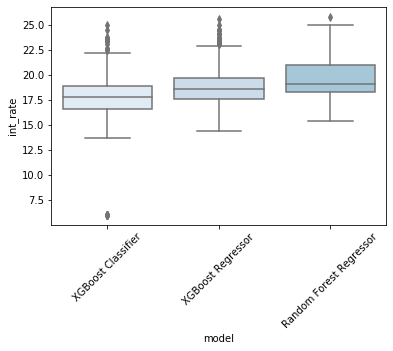

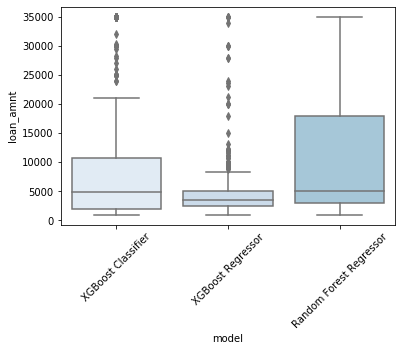

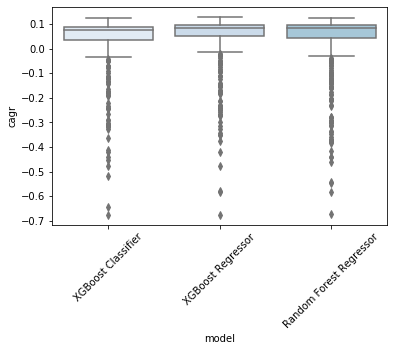

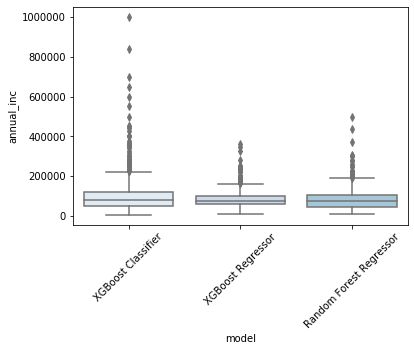

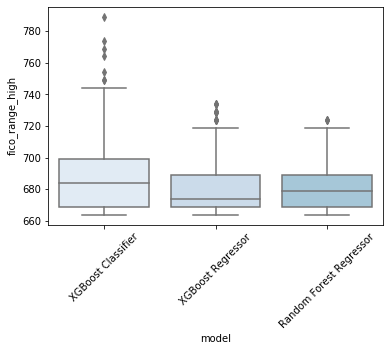

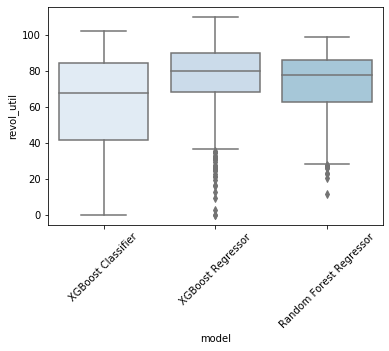

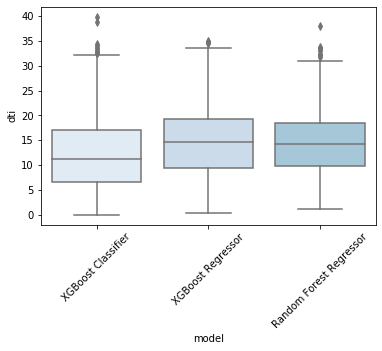

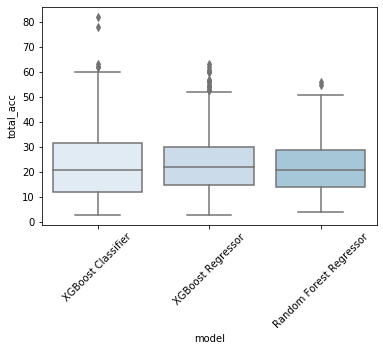

In [12]:
for i in ['int_rate','loan_amnt','cagr','annual_inc','fico_range_high','revol_util','dti', 'total_acc']:
    plt.figure()
    chart = sns.boxplot(x = 'model', y = i, data = pools[pools['model']!= 'Population'],palette = sns.color_palette("Blues", n_colors=7))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


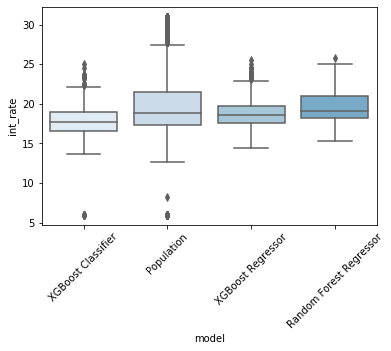

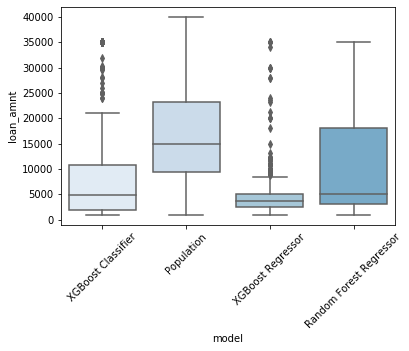

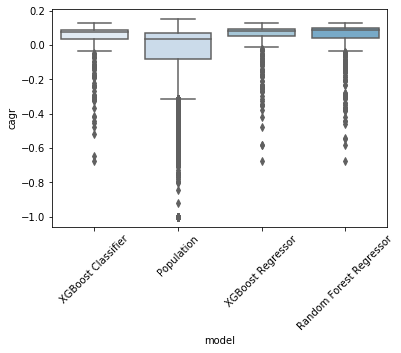

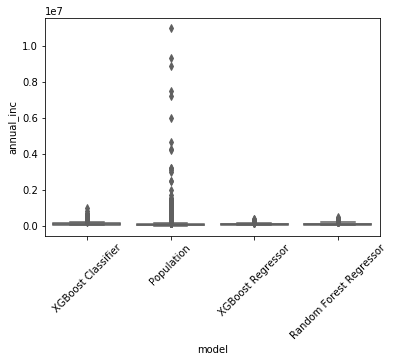

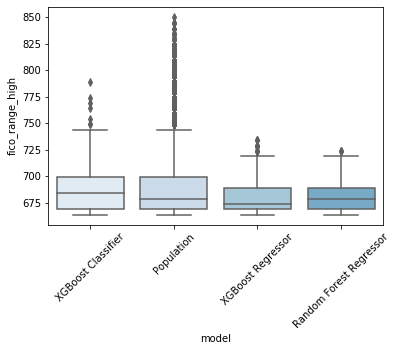

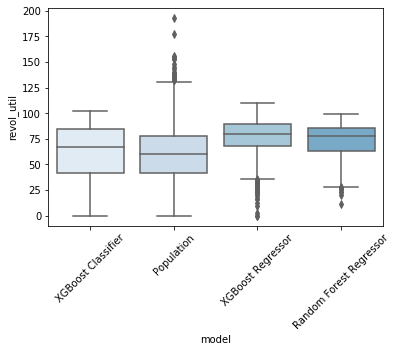

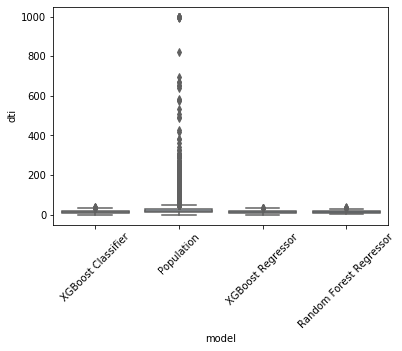

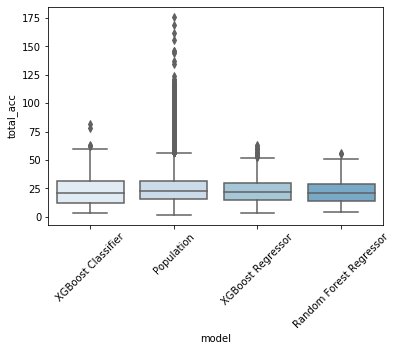

In [13]:
for i in ['int_rate','loan_amnt','cagr','annual_inc','fico_range_high','revol_util','dti', 'total_acc']:
    plt.figure()
    chart = sns.boxplot(x = 'model', y = i, data = pools,palette = sns.color_palette("Blues", n_colors=7))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


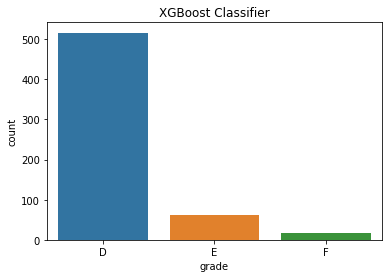

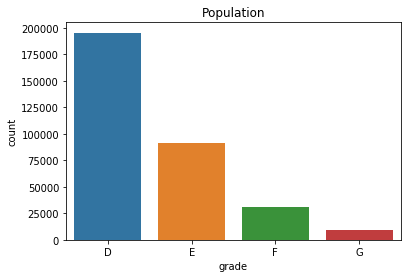

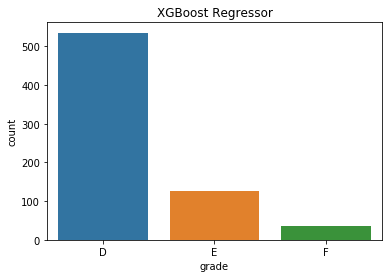

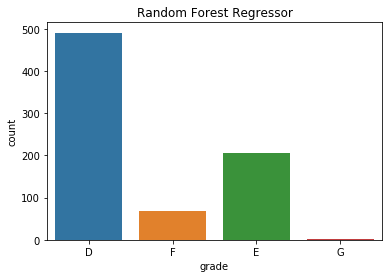

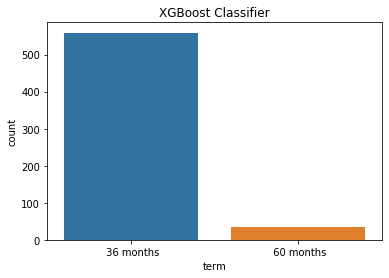

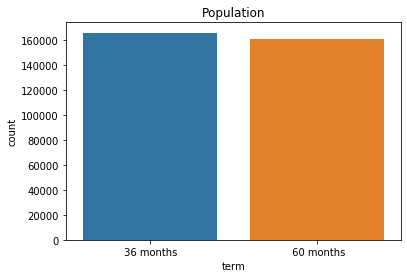

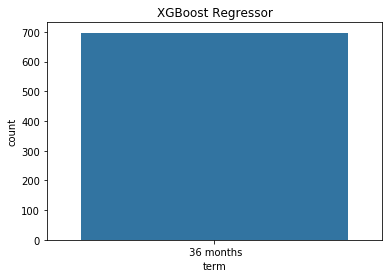

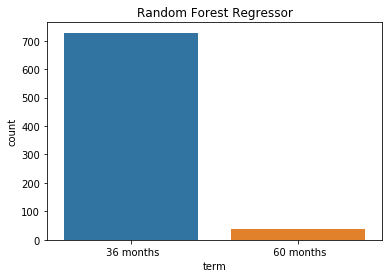

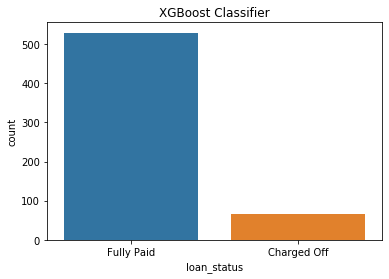

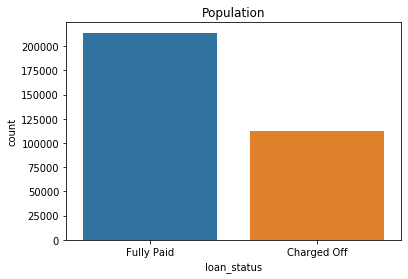

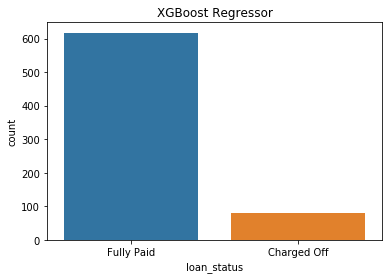

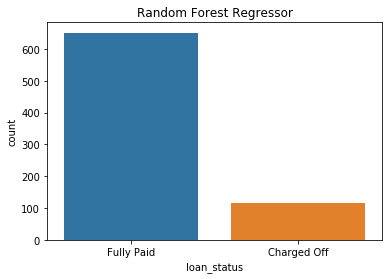

In [14]:
for i in ['grade','term','loan_status']:
    for x in ['XGBoost Classifier', 'Population', 'XGBoost Regressor', 'Random Forest Regressor']:
        plt.figure()
        sns.countplot(data = pools[pools['model'] == x], x = i).set_title(x)
        

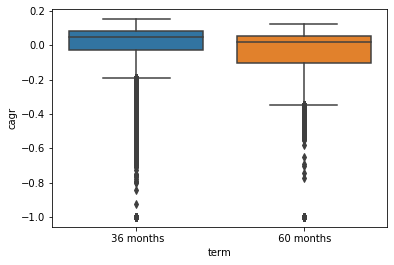

In [15]:
# population boxplots
sns.boxplot(data = pools[pools['model'] == 'Population'], x = 'term',  y = 'cagr')

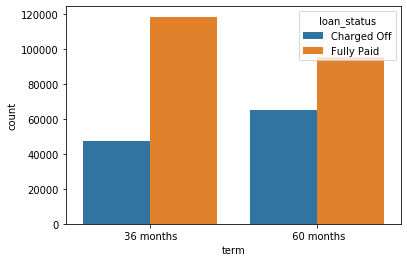

In [16]:
sns.barplot(data = pools[pools['model'] == 'Population'].groupby(['loan_status','term'])['term'].count().reset_index(name = 'count'), x = 'term', y = 'count', hue = 'loan_status')

In [17]:
# how similar are the pools of loans
l = pools[pools['model'] != 'Population']
l = l[['model','id']].merge(l[['model','id']], on= 'id')
pd.crosstab(l.model_x,l.model_y)

model_y,Random Forest Regressor,XGBoost Classifier,XGBoost Regressor
model_x,,,
Random Forest Regressor,767,17,52
XGBoost Classifier,17,594,42
XGBoost Regressor,52,42,697


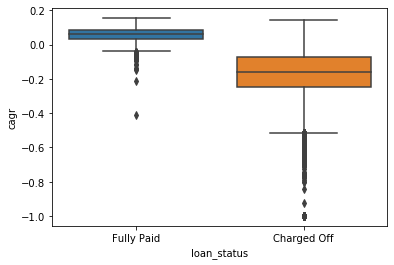

In [18]:
sns.boxplot(data = pools[pools['model'] == 'Population'], x = 'loan_status',  y = 'cagr')

In [19]:
# percent of loans paid back early
pools[pools['model'] == 'Population']

,cagr,id,model,loan_amnt,annual_inc,installment,term,int_rate,grade,sub_grade,...,home_ownership,loan_status,issue_d,addr_state,dti,fico_range_high,revol_util,total_pymnt,chargeoff_within_12_mths,total_acc
1,0.009320,37840324,Population,1125.0,23000.0,40.19,36 months,17.14,D,D4,...,RENT,Fully Paid,Dec-2014,AR,26.98,719.0,78.3,1156.750000,0.0,12.0
3,0.002807,36039529,Population,1300.0,16000.0,45.70,36 months,15.99,D,D2,...,MORTGAGE,Fully Paid,Dec-2014,CA,13.95,674.0,15.8,1310.980000,0.0,46.0
5,0.074406,37307656,Population,25000.0,65000.0,533.96,60 months,6.00,D,D5,...,RENT,Fully Paid,Dec-2014,OH,31.46,719.0,80.6,35791.742160,0.0,32.0
7,0.023247,36611144,Population,35000.0,400000.0,899.09,60 months,18.54,E,E1,...,MORTGAGE,Fully Paid,Dec-2014,CA,15.18,724.0,35.9,39261.780000,0.0,32.0
9,0.083913,36280959,Population,1000.0,28000.0,35.40,36 months,16.49,D,D3,...,RENT,Fully Paid,Dec-2014,CA,26.66,664.0,97.2,1273.453487,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328710,0.005987,90805411,Population,32500.0,65000.0,825.11,60 months,17.99,D,D2,...,RENT,Fully Paid,Oct-2016,NJ,27.99,709.0,56.9,33484.615180,0.0,18.0
328711,0.067929,90141265,Population,10400.0,58000.0,284.23,60 months,21.49,D,D5,...,MORTGAGE,Fully Paid,Oct-2016,IL,15.70,664.0,72.4,14445.908792,0.0,21.0
328712,-0.114773,90726974,Population,16000.0,69000.0,414.97,60 months,18.99,D,D3,...,MORTGAGE,Charged Off,Oct-2016,WI,9.22,669.0,53.1,8697.490000,0.0,13.0
328713,0.011100,90855576,Population,28000.0,75000.0,868.26,60 months,27.79,F,F5,...,RENT,Fully Paid,Oct-2016,CA,15.10,714.0,25.4,29588.883874,0.0,32.0


In [20]:
# create expected payment columns
pools['term_int'] = pools['term'].apply(lambda x: int(x.strip()[:2]))

pools['expected_payments'] = pools['installment'] * pools['term_int']

pools['exp_payment_delta'] = pools['total_pymnt'] - pools['expected_payments']

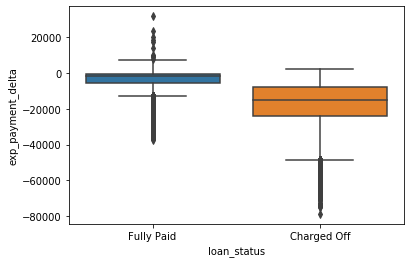

In [21]:
sns.boxplot(data = pools[pools['model'] == 'Population'], x = 'loan_status', y = 'exp_payment_delta')

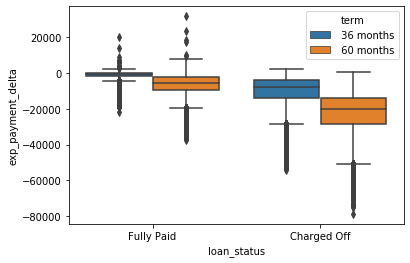

In [22]:
sns.boxplot(data = pools[pools['model'] == 'Population'], x = 'loan_status', y = 'exp_payment_delta', hue = 'term')

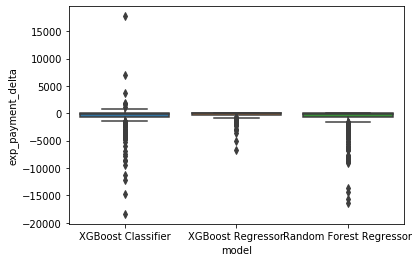

In [23]:
sns.boxplot(data = pools.loc[(pools['loan_status'] == 'Fully Paid') & (pools['model'] != 'Population')], x = 'model', y = 'exp_payment_delta')

In [24]:
['int_rate','loan_amnt','cagr','annual_inc','fico_range_high','revol_util','dti', 'total_acc','exp_payment_delta']

['int_rate',
 'loan_amnt',
 'cagr',
 'annual_inc',
 'fico_range_high',
 'revol_util',
 'dti',
 'total_acc',
 'exp_payment_delta']

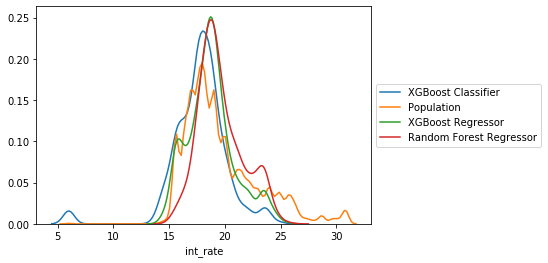

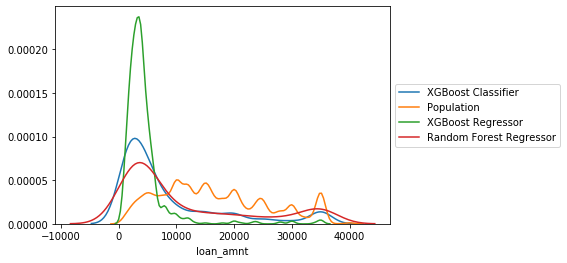

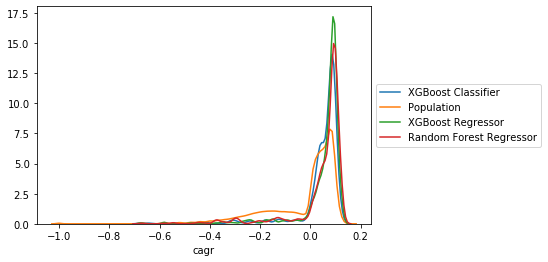

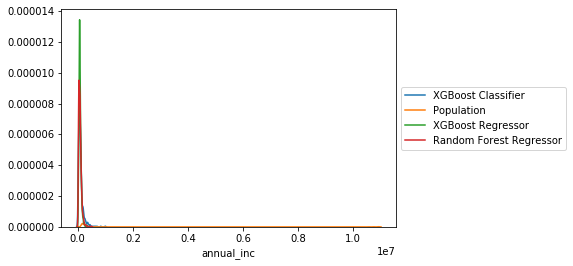

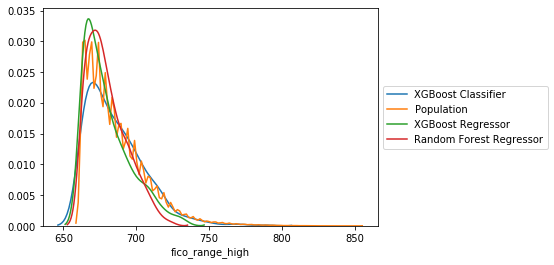

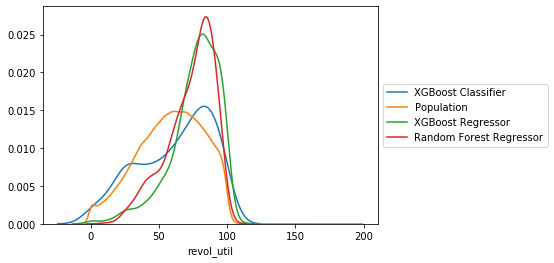

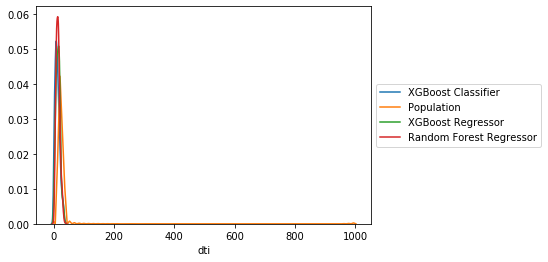

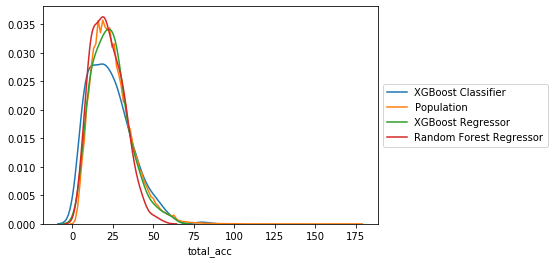

In [25]:
for i in ['int_rate','loan_amnt','cagr','annual_inc','fico_range_high','revol_util','dti', 'total_acc']:
    plt.figure()
    for x in ['XGBoost Classifier', 'Population', 'XGBoost Regressor', 'Random Forest Regressor']:
        temp = pools[pools['model'] == x]

        var = temp[i]

        label = x
        sns.distplot(var, bins = 50, hist=False, label = label)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Remake:
- annual_inc
- dti

No handles with labels found to put in legend.


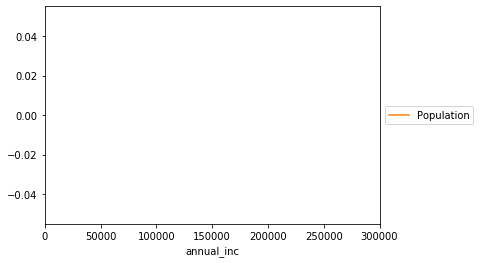

In [31]:
for x in ['XGBoost Classifier', 'Population', 'XGBoost Regressor', 'Random Forest Regressor']:
        temp = pools[(pools['model'] == x) & (pools['annual_inc']<100)]

        var = temp['annual_inc']

        label = x
        sns.distplot(var, bins = 50, hist=False, label = label)
        plt.xlim(0,300000)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [27]:
p = pools[pools['model'] == 'Population']

(0, 400000)

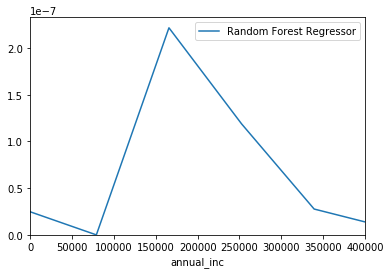

In [28]:
sns.distplot(p['annual_inc'], bins = 100000, hist=False, label = label)
plt.xlim(0,400000)

In [29]:
p['annual_inc'].describe()

count    3.266570e+05
mean     7.110009e+04
std      6.228886e+04
min      3.900000e+01
25%      4.340700e+04
50%      6.000000e+04
75%      8.500000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

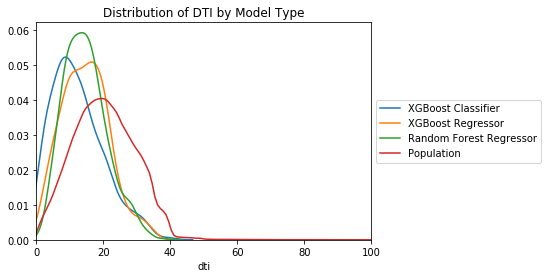

In [32]:
for x in ['XGBoost Classifier', 'XGBoost Regressor', 'Random Forest Regressor', 'Population']:
        temp = pools[(pools['model'] == x) & (pools['dti']<100)]

        var = temp['dti']

        label = x
        sns.distplot(var, bins = 50, hist=False, label = label)
        plt.xlim(0,100)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title('Distribution of DTI by Model Type')


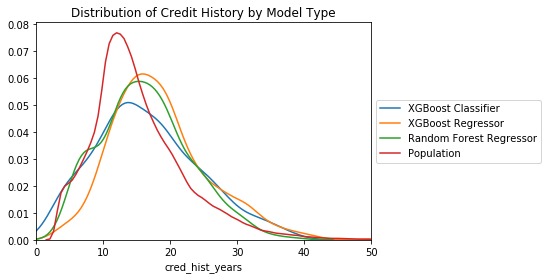

In [54]:
for x in ['XGBoost Classifier', 'XGBoost Regressor', 'Random Forest Regressor', 'Population']:
        temp = pools[(pools['model'] == x)]

        var = temp['cred_hist_years']

        label = x
        sns.distplot(var, bins = 50, hist=False, label = label)
        plt.xlim(0,50)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title('Distribution of Credit History by Model Type')

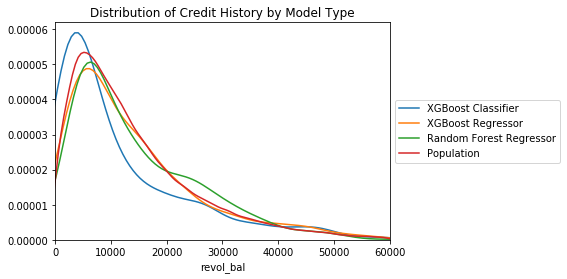

In [76]:
for x in ['XGBoost Classifier', 'XGBoost Regressor', 'Random Forest Regressor', 'Population']:
        temp = pools[(pools['model'] == x)& (pools['revol_bal']<60000)]

        var = temp['revol_bal']

        label = x
        sns.distplot(var, bins = 50, hist=False, label = label)
        plt.xlim(0,60000)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title('Distribution of Revolving Balance by Model Type')

### Insights from post modal and simulation EDA
- high utilization was sacrficed in place of low DTI and longer credit history
- 36 month loans were prefered, they were more likely to be paid off in full with interest
- XGBoost Regressor significantly favored lower loan amount
- Random Forest was the most risky when it comes to grade, cared a lot about debt metrics

